| Name  | Surname   | Student No  | Department  |
|---|---|---|---|
| Emin  | Kartci  | S014877  | EE Engineering  |
|Ozan | Yurtsever | S015164 | EE Engineering |
|Yamaç Demirkan| Yılmaz |S018368 |Computer Science|
|Muhammed Ali |Kumaşoğlu| S018505|EE Engineering |



## If you cannot use foluim library, you can still execute the simulation
# If you do not have the libraries INSTALL THEM


In [ ]:

!pip3 install foursquare
!pip3 install folium
!pip3 install geopy

     |████████████████████████████████| 94 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 1.1 MB/s eta 0:00:01


In [1]:
# To interact with user use ipywidgets library - Generate a simple GUI
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time

# import pandas and json to handle data
import pandas as pd
import json 

# import manuel libraries
from Company import Company
from SimulationLibrary import SimulationEnvironment

# Mapping libraries
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests
import pandas as pd
import folium
from folium import plugins



ModuleNotFoundError: No module named 'folium'

In [2]:
# DEFINE THE IPYWIDGETS

# title - start
programLabel = widgets.Label('-------------------------->  RESTAURANT SIMULATOR PROGRAM  <--------------------------', layout=widgets.Layout(width='100%'))

# company info
companyName = widgets.Text(description="Comp. Name",value="Example LTD",layout=widgets.Layout(width="50%"))
longitude = widgets.Text(description="Longitude",value="40.730610",layout=widgets.Layout(width="30%"))
latitude = widgets.Text(description="Latitude",value="-73.935242",layout=widgets.Layout(width="30%"))
infoLabel = widgets.Label('------!  You have to define a location around NEWYORK ## Center 40.74 & -73.94 ## !------', layout=widgets.Layout(width='100%'))
# break
br1Label = widgets.Label('-----------------------------------------------------------------------------------------------------', layout=widgets.Layout(width='100%'))

# services
servicesLabel = widgets.Label('Select Services:', layout=widgets.Layout(width='100%'))
Dessertbox = widgets.Checkbox(False, description='Dessert')
Saladbox = widgets.Checkbox(False, description='Salad')
Drinkbox = widgets.Checkbox(False, description='Drink')

# break
br2Label = widgets.Label('-----------------------------------------------------------------------------------------------------', layout=widgets.Layout(width='100%'))

# product info - income statement parameters
expectedPriceLabel = widgets.Label('Expected Average Price:', layout=widgets.Layout(width='100%'))
expectedAveragePrice = widgets.IntSlider(min=10, max=100, step=1, description='(Euro): ',value=0)

expectedUnitCostLabel = widgets.Label('Expected Average Unit Cost:', layout=widgets.Layout(width='100%'))
expectedUnitCost = widgets.IntSlider(min=5, max=50, step=1, description='(Euro): ',value=0)

expectedSalesLabel = widgets.Label('Expected Sales Monthly:', layout=widgets.Layout(width='100%'))
expectedSales = widgets.IntSlider(min=5000, max=10000, step=1, description='(Euro): ',value=0)

# company expenses
fixedCostLabel = widgets.Label('Fixed Costs:', layout=widgets.Layout(width='100%'))
fixedCost = widgets.FloatText(value=10000, description='(Euro): ',color = 'blue')

taxRateLabel = widgets.Label('Tax Rate:', layout=widgets.Layout(width='100%'))
taxRate = widgets.FloatSlider(min=5, max=100, step=1, description='%: ',value=0)

# break - finish
br3Label = widgets.Label('-----------------------------------------------------------------------------------------------------', layout=widgets.Layout(width='100%'))

In [3]:
# This function gets the ipywidget checkboxes and creates a proper list 
# that will be used at the COMPANY Class.

# create a string list bu considering checkbox widgets
def set_service_list():
    
    # create an empty list
    serviceList = []
    
    # if it is checked
    if Dessertbox.value:
        # add to the list
        serviceList.append('Dessert')
    # if it is checked
    if Saladbox.value:
        # add to the list
        serviceList.append('Salad')
    # if it is checked
    if Drinkbox.value:
        # add to the list
        serviceList.append('Drink')
    
    # return the list
    return serviceList

In [27]:
# IMPORTANT 

# Before here you MUST run at leas 1 time to libraries
# and also definition of these objects



# display the widgets that I defined Here  
display(programLabel)

display(companyName)
display(longitude)
display(latitude)
display(infoLabel)
display(br2Label)


display(servicesLabel)
display(Dessertbox)
display(Saladbox)
display(Drinkbox)

display(br2Label)

display(expectedPriceLabel)
display(expectedAveragePrice)

display(expectedUnitCostLabel)
display(expectedUnitCost)

display(expectedSalesLabel)
display(expectedSales)

display(fixedCostLabel)
display(fixedCost)

display(taxRateLabel)
display(taxRate)

display(br3Label)


# HERE PLEASE TYPE YOUR COMPANY'S INFORMATION

Label(value='-------------------------->  RESTAURANT SIMULATOR PROGRAM  <--------------------------', layout=L…

Text(value='Example LTD', description='Comp. Name', layout=Layout(width='50%'))

Text(value='40.730610', description='Longitude', layout=Layout(width='30%'))

Text(value='-73.935242', description='Latitude', layout=Layout(width='30%'))

Label(value='------!  You have to define a location around NEWYORK ## Center 40.74 & -73.94 ## !------', layou…

Label(value='-------------------------------------------------------------------------------------------------…

Label(value='Select Services:', layout=Layout(width='100%'))

Checkbox(value=False, description='Dessert')

Checkbox(value=False, description='Salad')

Checkbox(value=False, description='Drink')

Label(value='-------------------------------------------------------------------------------------------------…

Label(value='Expected Average Price:', layout=Layout(width='100%'))

IntSlider(value=10, description='(Euro): ', min=10)

Label(value='Expected Average Unit Cost:', layout=Layout(width='100%'))

IntSlider(value=5, description='(Euro): ', max=50, min=5)

Label(value='Expected Sales Monthly:', layout=Layout(width='100%'))

IntSlider(value=5000, description='(Euro): ', max=10000, min=5000)

Label(value='Fixed Costs:', layout=Layout(width='100%'))

FloatText(value=10000.0, description='(Euro): ')

Label(value='Tax Rate:', layout=Layout(width='100%'))

FloatSlider(value=5.0, description='%: ', min=5.0, step=1.0)

Label(value='-------------------------------------------------------------------------------------------------…

In [5]:
# Create the environment and the company
SimEnv = SimulationEnvironment()

# if the location input is too far away ask a new location 
distanceFromCenter = SimEnv.calculate_distance_lon_lat(float(longitude.value),float(latitude.value),40.730610,-73.935242)

# if location is greater then 10000 KM
if distanceFromCenter > 10000:
    # inform the user
    print("Check Your Location:\nLon: {}\nLat: {}\nDistance from center: {}\nSelect it again!! Otherwise your location will be considered as center!!".format(longitude.value,latitude.value,distanceFromCenter))
    # take the center as location 40.74 & -73.94
    company = Company(companyName.value,40.74,-73.94,set_service_list(),expectedAveragePrice.value,expectedUnitCost.value,expectedSales.value,fixedCost.value,taxRate.value)
else:
    # create a company object
    company = Company(companyName.value,longitude.value,latitude.value,set_service_list(),expectedAveragePrice.value,expectedUnitCost.value,expectedSales.value,fixedCost.value,taxRate.value)
    # print income statement



In [6]:
# Describe the company
company.print_company_description()

# save the company properties as txt file
# company.save_company_description_to()



            Company Name: Example LTD

            Location:
                - Longitude : 40.730610° N
                - Latitude  : -73.935242° E

            Services:
            
            There is no service !!
            
            Average Price      : 10
            Average Unit Cost  : 5

            Sales Volume       : 5000

            Fixed Cost         : 10000.0

            Tax Rate           : 0.05


        


In [7]:
# Show the income statement of the company
company.print_income_statement()

# Save income statement as txt
#company.save_income_statement()



                    ==========  Example LTD's MONTHLY INCOME STATEMENT  ==========
                   +------------------------------------------------------
                   | Unit Price    : 10
                   | Unit Cost     : 5
                   +------------------
                   | Contribution Margin : 5
                   | Sales Volume        : 5000
                   | Revenue             : 50000 (Monthly)
                   +------------------
                   | Cost of Goods Sold  : 25000 (Monthly)
                   | Total Fixed Cost    : 10000.0 (Monthly)
                   | Total Cost          : 35000.0
                   +------------------
                   | Gross Margin        : 25000
                   | Taxes               : 1250.0
                   +------------------
                   | NET INCOME          : 23750.0
                   +------------------------------------------------------


        


findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.


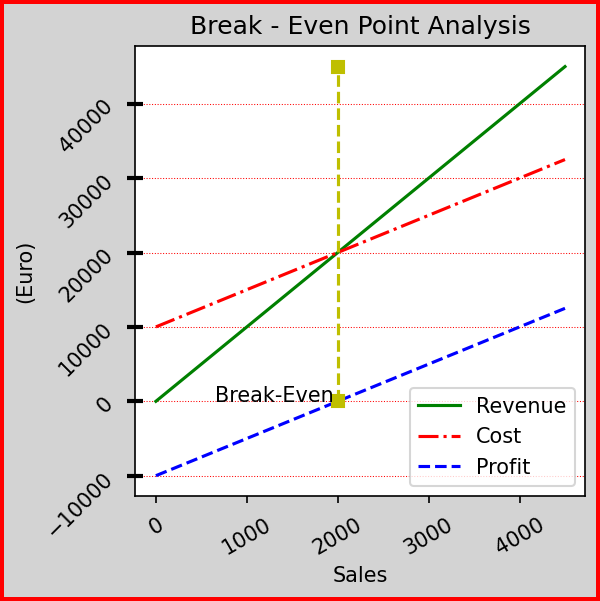

In [8]:
# plot break-even analysis
company.plot_break_even_point()

In [9]:
# CONSIDERING BORROWING OPTIONS

# Future Value

#     You can convert your money to the future value with a defined number of period 
# and certain interest rate


# create GUI objects
PresentValueLabel = widgets.Label('Present Value:', layout=widgets.Layout(width='100%'))
PresentValue = widgets.FloatText(value=1000, description='(Euro): ',continous_update = True)

FutureValueLabel = widgets.Label('Future Value:', layout=widgets.Layout(width='100%'))
FuturetValue = widgets.FloatText(SimEnv.calculate_FV(PresentValue.value,1,0.1), description='(Euro): ',disabled = True)

PeriodValueLabel = widgets.Label('Period Number:', layout=widgets.Layout(width='100%'))
PeriodValue = widgets.FloatText(1, description='Years: ')

RateValueLabel = widgets.Label('Annually Interest Rate:', layout=widgets.Layout(width='100%'))
RateValue = widgets.FloatText(0.10, description='Rate: ')

FV_Calculate_Button = widgets.Button(description="Calculate!")
FV_output = widgets.Output()


# when the button is clicked
def on_button_clicked(b):
    with FV_output:
        # assign new values
        FuturetValue.value = SimEnv.calculate_FV(PresentValue.value,int(PeriodValue.value),float(RateValue.value))

# Display them
display(PresentValueLabel)
display(PresentValue)

display(FutureValueLabel)
display(FuturetValue)

display(PeriodValueLabel)
display(PeriodValue)

display(RateValueLabel)
display(RateValue)


display(FV_Calculate_Button,FV_output)
FV_Calculate_Button.on_click(on_button_clicked)
    
    

Label(value='Present Value:', layout=Layout(width='100%'))

FloatText(value=1000.0, description='(Euro): ')

Label(value='Future Value:', layout=Layout(width='100%'))

FloatText(value=1100.0, description='(Euro): ', disabled=True)

Label(value='Period Number:', layout=Layout(width='100%'))

FloatText(value=1.0, description='Years: ')

Label(value='Annually Interest Rate:', layout=Layout(width='100%'))

FloatText(value=0.1, description='Rate: ')

Button(description='Calculate!', style=ButtonStyle())

Output()

In [10]:
# CONSIDERING BORROWING OPTIONS

# Present Value

#     You can convert your money to the present value with a defined number of period 
# and certain interest rate


# create GUI objects
PresentValueLabel = widgets.Label('Present Value:', layout=widgets.Layout(width='100%'))
PresentValue = widgets.FloatText(SimEnv.calculate_PV(PresentValue.value,int(PeriodValue.value),0.1), description='(Euro): ',continous_update = True,disabled = True)

FutureValueLabel = widgets.Label('Future Value:', layout=widgets.Layout(width='100%'))
FuturetValue = widgets.FloatText(value=1000, description='(Euro): ')

PeriodValueLabel = widgets.Label('Period Number:', layout=widgets.Layout(width='100%'))
PeriodValue = widgets.FloatText(1, description='Years: ')

RateValueLabel = widgets.Label('Annually Interest Rate:', layout=widgets.Layout(width='100%'))
RateValue = widgets.FloatText(0.10, description='Rate: ')

FV_Calculate_Button = widgets.Button(description="Calculate!")
FV_output = widgets.Output()

# when the button is clicked
def on_button_clicked(b):
    with FV_output:
        # assign calculated results
        PresentValue.value = SimEnv.calculate_PV(FuturetValue.value,int(PeriodValue.value),float(RateValue.value))


# display them
display(PresentValueLabel)
display(PresentValue)

display(FutureValueLabel)
display(FuturetValue)

display(PeriodValueLabel)
display(PeriodValue)

display(RateValueLabel)
display(RateValue)


display(FV_Calculate_Button,FV_output)
FV_Calculate_Button.on_click(on_button_clicked)
    
    

Label(value='Present Value:', layout=Layout(width='100%'))

FloatText(value=909.090909090909, description='(Euro): ', disabled=True)

Label(value='Future Value:', layout=Layout(width='100%'))

FloatText(value=1000.0, description='(Euro): ')

Label(value='Period Number:', layout=Layout(width='100%'))

FloatText(value=1.0, description='Years: ')

Label(value='Annually Interest Rate:', layout=Layout(width='100%'))

FloatText(value=0.1, description='Rate: ')

Button(description='Calculate!', style=ButtonStyle())

Output()

In [11]:
# SIMULATION EXECUTIONS

# define constants
tax_rate = 20

# simulation environment is alreadt created as SimEnv but redefine it
SimEnv = SimulationEnvironment(customerCount=10000)



In [12]:
serviceList = ["Desert","Salad","Tea","Dinner","Kebap","Wine","Drink","Ice Cream"]
competitorList = []

#try to get closest 4 competitor companies
try:
    # you can make True if you want to see results
    competitorsPandasForm = SimEnv.get_closest_competitors(float(company.longitude),float( company.latitude),willPrint=False)
    
    # get 4 competitirs
    for index in range(4):
        
        # create object
        competitor = Company(competitorsPandasForm["NAME"][index]      ,competitorsPandasForm["LONGITUDE"][index]   ,competitorsPandasForm["LATITUDE"][index]   ,random.choices(serviceList,k = 3) ,
                              random.randint(10,20)  ,random.randint(5,10)  ,random.randint(10000,30000) ,random.randint(150000,300000),tax_rate)
        
        # append the list
        competitorList.append(competitor)
    
    
#If any problem occurs while reading the objcets
except:
    # you can define your competitors properties manually
                        # NAME              LOCATION   SERVICES         PRICE COST  SALES FIXED COST
    competitor1 = Company("Happy Moon"      ,25,63,["Desert","Salad"]    ,26  ,11  ,44533 ,21333     ,tax_rate)
    competitor2 = Company("Fell Falafel"    ,23,63,["Dinner","Salad"]    ,16  ,13  ,24533 ,23633     ,tax_rate)
    competitor3 = Company("Kartci's Place"  ,21,65,["Desert","Breakfast"],36  ,9   ,64533 ,23343     ,tax_rate)
    competitor4 = Company("Nusret"          ,22,61,["Tea","Dring"]       ,46  ,26  ,77533 ,23233     ,tax_rate)
    
    competitorList.append(competitor1)
    competitorList.append(competitor2)
    competitorList.append(competitor3)
    competitorList.append(competitor4)


# show competitor List
for competitor in competitorList:
    # print description
    competitor.print_company_description()

# print table    
competitorsPandasForm






            Company Name: Allegro Coffee Company

            Location:
                - Longitude : -73.95953° N
                - Latitude  : 40.716159999999995° E

            Services:
            
            1 - Wine
			2 - Kebap
			3 - Tea
			
            
            Average Price      : 10
            Average Unit Cost  : 8

            Sales Volume       : 18451

            Fixed Cost         : 276203

            Tax Rate           : 0.2


        


            Company Name: Lower East Side Coffee Shop

            Location:
                - Longitude : -73.98065698318827° N
                - Latitude  : 40.73046806286133° E

            Services:
            
            1 - Dinner
			2 - Salad
			3 - Drink
			
            
            Average Price      : 18
            Average Unit Cost  : 5

            Sales Volume       : 14720

            Fixed Cost         : 191611

            Tax Rate           : 0.2


        


            Company Name: Coffee Project New 

NAME   LATITUDE  LONGITUDE      DISTANCE
0          Allegro Coffee Company  40.716160 -73.959530  18615.165791
1     Lower East Side Coffee Shop  40.730468 -73.980657  18617.199955
2         Coffee Project New York  40.687751 -73.979387  18617.540533
3     Irving Farm Coffee Roasters  40.736716 -73.986817  18617.769966
4  Caffe Vita Coffee Roasting Co.  40.719752 -73.988529  18618.135191

In [13]:
# if you dont define companies the environment creates random companies for you
SimEnv.print_companies()



            Company Name: Main Company

            Location:
                - Longitude : 11° N
                - Latitude  : 19° E

            Services:
            
            1 - coffee
			2 - drinks
			
            
            Average Price      : 25
            Average Unit Cost  : 14

            Sales Volume       : 3500

            Fixed Cost         : 34507

            Tax Rate           : 0.0007000000000000001


        


            Company Name: Competitor1

            Location:
                - Longitude : 10° N
                - Latitude  : 16° E

            Services:
            
            1 - salad
			2 - drinks
			
            
            Average Price      : 25
            Average Unit Cost  : 11

            Sales Volume       : 910

            Fixed Cost         : 97462

            Tax Rate           : 0.0016


        


            Company Name: Competitor2

            Location:
                - Longitude : 19° N
                - Latitude  : 1

In [14]:
# You can set your companies by providing a company list
SimEnv.define_competitor_companies(competitorList)

# now let see the new companeies
SimEnv.print_companies()



            Company Name: Main Company

            Location:
                - Longitude : 11° N
                - Latitude  : 19° E

            Services:
            
            1 - coffee
			2 - drinks
			
            
            Average Price      : 25
            Average Unit Cost  : 14

            Sales Volume       : 3500

            Fixed Cost         : 34507

            Tax Rate           : 0.0007000000000000001


        


            Company Name: Allegro Coffee Company

            Location:
                - Longitude : -73.95953° N
                - Latitude  : 40.716159999999995° E

            Services:
            
            1 - Wine
			2 - Kebap
			3 - Tea
			
            
            Average Price      : 10
            Average Unit Cost  : 8

            Sales Volume       : 18451

            Fixed Cost         : 276203

            Tax Rate           : 0.2


        


            Company Name: Lower East Side Coffee Shop

            Location:
         

In [15]:
# you can execute the simulation by this function
SimEnv.execute_simulation()

# The log of the simulation will be printed to the console



Company Allegro Coffee Company is far away from 6821 customer.

Company Irving Farm Coffee Roasters is far away from 8708 customer.

Company Irving Farm Coffee Roasters is far away from 459 customer.

Company Coffee Project New York is far away from 650 customer.

Customer 6257 spend 9 tl at Coffee Project New York which has a cost 4.68.

Company Allegro Coffee Company is far away from 8297 customer.

Company Coffee Project New York is far away from 2253 customer.

Company Lower East Side Coffee Shop is far away from 6631 customer.

Company Allegro Coffee Company is far away from 4451 customer.

Company Coffee Project New York is far away from 4115 customer.

Company Main Company is far away from 3719 customer.

Company Lower East Side Coffee Shop is far away from 2120 customer.

Company Irving Farm Coffee Roasters is far away from 5692 customer.

Customer 1933 spend 12 tl at Irving Farm Coffee Roasters which has a cost 4.08.

Company Coffee Project New York is far away from 6747 cust


Customer 6183 spend 11 tl at Coffee Project New York which has a cost 5.0600000000000005.

Company Irving Farm Coffee Roasters is far away from 178 customer.

Company Irving Farm Coffee Roasters is far away from 9335 customer.

Customer 6071 spend 29 tl at Main Company which has a cost 20.299999999999997.

Company Coffee Project New York is far away from 604 customer.

Company Allegro Coffee Company is far away from 823 customer.

Company Lower East Side Coffee Shop is far away from 1434 customer.

Company Lower East Side Coffee Shop is far away from 3360 customer.

Company Coffee Project New York is far away from 6621 customer.

Company Irving Farm Coffee Roasters is far away from 9550 customer.

Company Irving Farm Coffee Roasters is far away from 4720 customer.

Company Coffee Project New York is far away from 2724 customer.

Company Irving Farm Coffee Roasters is far away from 7545 customer.

Company Coffee Project New York is far away from 1878 customer.

Company Coffee Project N

Company Lower East Side Coffee Shop is far away from 6879 customer.

Customer 474 spend 16 tl at Irving Farm Coffee Roasters which has a cost 6.56.

Customer 4777 spend 10 tl at Coffee Project New York which has a cost 4.4.

Company Allegro Coffee Company is far away from 2502 customer.

Company Lower East Side Coffee Shop is far away from 9229 customer.

Company Lower East Side Coffee Shop is far away from 1113 customer.

Company Allegro Coffee Company is far away from 8442 customer.

Company Lower East Side Coffee Shop is far away from 7601 customer.

Company Coffee Project New York is far away from 3172 customer.

Company Coffee Project New York is far away from 1035 customer.

Company Main Company is far away from 1626 customer.

Customer 5977 spend 16 tl at Lower East Side Coffee Shop which has a cost 11.04.

Company Irving Farm Coffee Roasters is far away from 4275 customer.

Company Lower East Side Coffee Shop is far away from 5966 customer.

Company Allegro Coffee Company is fa


Customer 1415 spend 17 tl at Main Company which has a cost 7.65.

Company Irving Farm Coffee Roasters is far away from 6326 customer.

Company Allegro Coffee Company is far away from 3593 customer.

Company Irving Farm Coffee Roasters is far away from 2623 customer.

Company Lower East Side Coffee Shop is far away from 7928 customer.

Company Allegro Coffee Company is far away from 1665 customer.

Company Allegro Coffee Company is far away from 2997 customer.

Company Irving Farm Coffee Roasters is far away from 168 customer.

Company Main Company is far away from 2500 customer.

Company Main Company is far away from 6731 customer.

Company Coffee Project New York is far away from 4095 customer.

Company Lower East Side Coffee Shop is far away from 7629 customer.

Company Coffee Project New York is far away from 583 customer.

Company Lower East Side Coffee Shop is far away from 612 customer.

Company Irving Farm Coffee Roasters is far away from 7176 customer.

Company Coffee Project 

Company Lower East Side Coffee Shop is far away from 7331 customer.

Company Allegro Coffee Company is far away from 11 customer.

Company Coffee Project New York is far away from 470 customer.

Company Coffee Project New York is far away from 5762 customer.

Company Irving Farm Coffee Roasters is far away from 1770 customer.

Customer 9890 has not enough budget for Main Company company.

Company Main Company is far away from 8945 customer.

Company Coffee Project New York is far away from 3725 customer.

Company Allegro Coffee Company is far away from 2757 customer.

Company Allegro Coffee Company is far away from 761 customer.

Company Irving Farm Coffee Roasters is far away from 9163 customer.

Company Main Company is far away from 1007 customer.

Customer 3091 spend 15 tl at Irving Farm Coffee Roasters which has a cost 8.25.

Company Irving Farm Coffee Roasters is far away from 4139 customer.

Company Main Company is far away from 4309 customer.

Company Irving Farm Coffee Roasters


Company Allegro Coffee Company is far away from 1502 customer.

Company Irving Farm Coffee Roasters is far away from 6008 customer.

Company Main Company is far away from 1677 customer.

Company Lower East Side Coffee Shop is far away from 5722 customer.

Company Main Company is far away from 6815 customer.

Company Coffee Project New York is far away from 671 customer.

Company Allegro Coffee Company is far away from 8232 customer.

Company Allegro Coffee Company is far away from 2584 customer.

Company Irving Farm Coffee Roasters is far away from 5661 customer.

Company Main Company is far away from 9460 customer.

Company Allegro Coffee Company is far away from 1559 customer.

Company Coffee Project New York is far away from 6467 customer.

Company Coffee Project New York is far away from 7751 customer.

Company Coffee Project New York is far away from 7266 customer.

Company Irving Farm Coffee Roasters is far away from 683 customer.

Company Coffee Project New York is far away fro

Company Irving Farm Coffee Roasters is far away from 3996 customer.

Company Coffee Project New York is far away from 5752 customer.

Company Irving Farm Coffee Roasters is far away from 9452 customer.

Company Lower East Side Coffee Shop is far away from 9986 customer.

Customer 7892 has not enough budget for Main Company company.

Company Main Company is far away from 8915 customer.

Customer 8102 spend 10 tl at Allegro Coffee Company which has a cost 6.1.

Company Lower East Side Coffee Shop is far away from 1113 customer.

Company Coffee Project New York is far away from 3984 customer.

Company Coffee Project New York is far away from 7840 customer.

Company Coffee Project New York is far away from 3506 customer.

Company Allegro Coffee Company is far away from 6067 customer.

Company Main Company is far away from 771 customer.

Company Coffee Project New York is far away from 3694 customer.

Customer 2806 spend 18 tl at Irving Farm Coffee Roasters which has a cost 8.1.

Company Lo


Company Coffee Project New York is far away from 7553 customer.

Customer 4792 has not enough budget for Main Company company.

Company Coffee Project New York is far away from 4195 customer.

Customer 7065 has not enough budget for Irving Farm Coffee Roasters company.

Company Irving Farm Coffee Roasters is far away from 2805 customer.

Customer 2893 spend 12 tl at Allegro Coffee Company which has a cost 4.92.

Company Lower East Side Coffee Shop is far away from 1905 customer.

Company Coffee Project New York is far away from 1358 customer.

Company Irving Farm Coffee Roasters is far away from 9506 customer.

Company Lower East Side Coffee Shop is far away from 1874 customer.

Company Coffee Project New York is far away from 1442 customer.

Company Main Company is far away from 749 customer.

Company Coffee Project New York is far away from 5074 customer.

Customer 9055 has not enough budget for Main Company company.

Company Coffee Project New York is far away from 2227 customer.



Company Lower East Side Coffee Shop is far away from 632 customer.

Company Main Company is far away from 3650 customer.

Company Main Company is far away from 1966 customer.

Company Allegro Coffee Company is far away from 6142 customer.

Company Allegro Coffee Company is far away from 300 customer.

Company Coffee Project New York is far away from 3268 customer.

Customer 1586 has not enough budget for Main Company company.

Company Coffee Project New York is far away from 3782 customer.

Company Allegro Coffee Company is far away from 5404 customer.

Company Irving Farm Coffee Roasters is far away from 9464 customer.

Company Allegro Coffee Company is far away from 3907 customer.

Company Main Company is far away from 3058 customer.

Company Main Company is far away from 737 customer.

Company Irving Farm Coffee Roasters is far away from 8712 customer.

Company Allegro Coffee Company is far away from 2556 customer.

Company Main Company is far away from 4235 customer.

Customer 2020


Company Allegro Coffee Company is far away from 9845 customer.

Company Main Company is far away from 625 customer.

Company Lower East Side Coffee Shop is far away from 1125 customer.

Company Coffee Project New York is far away from 8359 customer.

Company Irving Farm Coffee Roasters is far away from 4105 customer.

Company Coffee Project New York is far away from 238 customer.

Company Lower East Side Coffee Shop is far away from 2539 customer.

Company Allegro Coffee Company is far away from 8385 customer.

Company Coffee Project New York is far away from 4371 customer.

Customer 7007 has not enough budget for Allegro Coffee Company company.

Customer 8682 spend 12 tl at Coffee Project New York which has a cost 7.68.

Company Irving Farm Coffee Roasters is far away from 1729 customer.

Company Lower East Side Coffee Shop is far away from 6012 customer.

Company Coffee Project New York is far away from 204 customer.

Customer 3389 spend 9 tl at Coffee Project New York which has a c

Company Main Company is far away from 1044 customer.

Company Allegro Coffee Company is far away from 5674 customer.

Company Lower East Side Coffee Shop is far away from 8978 customer.

Company Allegro Coffee Company is far away from 5628 customer.

Company Irving Farm Coffee Roasters is far away from 3337 customer.

Company Lower East Side Coffee Shop is far away from 9705 customer.

Company Coffee Project New York is far away from 2945 customer.

Company Main Company is far away from 1495 customer.

Company Allegro Coffee Company is far away from 8279 customer.

Company Coffee Project New York is far away from 4740 customer.

Company Main Company is far away from 6979 customer.

Company Main Company is far away from 8717 customer.

Company Allegro Coffee Company is far away from 3456 customer.

Company Irving Farm Coffee Roasters is far away from 5236 customer.

Company Lower East Side Coffee Shop is far away from 2671 customer.

Company Lower East Side Coffee Shop is far away from 

Company Irving Farm Coffee Roasters is far away from 6091 customer.

Company Irving Farm Coffee Roasters is far away from 886 customer.

Company Irving Farm Coffee Roasters is far away from 3379 customer.

Company Main Company is far away from 4537 customer.

Company Coffee Project New York is far away from 3071 customer.

Company Allegro Coffee Company is far away from 2582 customer.

Company Allegro Coffee Company is far away from 3425 customer.

Customer 4852 has not enough budget for Main Company company.

Company Irving Farm Coffee Roasters is far away from 4695 customer.

Company Lower East Side Coffee Shop is far away from 4937 customer.

Customer 4034 spend 17 tl at Lower East Side Coffee Shop which has a cost 7.989999999999999.

Company Lower East Side Coffee Shop is far away from 1612 customer.

Customer 9002 has not enough budget for Irving Farm Coffee Roasters company.

Company Coffee Project New York is far away from 9171 customer.

Company Main Company is far away from 58


Company Lower East Side Coffee Shop is far away from 6540 customer.

Customer 6000 spend 11 tl at Allegro Coffee Company which has a cost 3.8499999999999996.

Company Irving Farm Coffee Roasters is far away from 3770 customer.

Customer 1738 spend 11 tl at Allegro Coffee Company which has a cost 5.39.

Company Irving Farm Coffee Roasters is far away from 6493 customer.

Company Main Company is far away from 9612 customer.

Company Coffee Project New York is far away from 4272 customer.

Company Main Company is far away from 7485 customer.

Company Main Company is far away from 4037 customer.

Company Main Company is far away from 6001 customer.

Company Coffee Project New York is far away from 500 customer.

Company Allegro Coffee Company is far away from 7872 customer.

Company Irving Farm Coffee Roasters is far away from 6614 customer.

Company Main Company is far away from 6940 customer.

Company Lower East Side Coffee Shop is far away from 6800 customer.

Customer 6238 has not eno

Company Coffee Project New York is far away from 6768 customer.

Company Coffee Project New York is far away from 5642 customer.

Customer 9367 has not enough budget for Coffee Project New York company.

Company Lower East Side Coffee Shop is far away from 798 customer.

Company Lower East Side Coffee Shop is far away from 8428 customer.

Company Coffee Project New York is far away from 165 customer.

Company Main Company is far away from 8798 customer.

Company Coffee Project New York is far away from 1459 customer.

Company Coffee Project New York is far away from 9896 customer.

Company Lower East Side Coffee Shop is far away from 7394 customer.

Company Irving Farm Coffee Roasters is far away from 1669 customer.

Company Allegro Coffee Company is far away from 6544 customer.

Company Irving Farm Coffee Roasters is far away from 1454 customer.

Company Lower East Side Coffee Shop is far away from 5002 customer.

Company Lower East Side Coffee Shop is far away from 3839 customer.

Co


Company Irving Farm Coffee Roasters is far away from 7582 customer.

Company Coffee Project New York is far away from 4006 customer.

Company Main Company is far away from 934 customer.

Company Lower East Side Coffee Shop is far away from 8484 customer.

Customer 1300 spend 9 tl at Allegro Coffee Company which has a cost 4.95.

Company Irving Farm Coffee Roasters is far away from 4847 customer.

Company Lower East Side Coffee Shop is far away from 5125 customer.

Customer 6014 has not enough budget for Allegro Coffee Company company.

Company Allegro Coffee Company is far away from 2181 customer.

Company Coffee Project New York is far away from 6348 customer.

Company Coffee Project New York is far away from 7985 customer.

Company Allegro Coffee Company is far away from 180 customer.

Company Main Company is far away from 9584 customer.

Company Irving Farm Coffee Roasters is far away from 9453 customer.

Customer 4726 spend 13 tl at Lower East Side Coffee Shop which has a cost 8.1

Customer 1759 spend 15 tl at Lower East Side Coffee Shop which has a cost 4.65.

Company Allegro Coffee Company is far away from 781 customer.

Company Allegro Coffee Company is far away from 1082 customer.

Company Main Company is far away from 9279 customer.

Company Irving Farm Coffee Roasters is far away from 7385 customer.

Company Irving Farm Coffee Roasters is far away from 3539 customer.

Company Coffee Project New York is far away from 6033 customer.

Company Irving Farm Coffee Roasters is far away from 5593 customer.

Company Lower East Side Coffee Shop is far away from 1838 customer.

Company Coffee Project New York is far away from 3619 customer.

Company Irving Farm Coffee Roasters is far away from 5608 customer.

Company Lower East Side Coffee Shop is far away from 3652 customer.

Company Allegro Coffee Company is far away from 8715 customer.

Company Allegro Coffee Company is far away from 1503 customer.

Company Lower East Side Coffee Shop is far away from 2448 customer

Company Main Company is far away from 5167 customer.

Company Lower East Side Coffee Shop is far away from 1262 customer.

Company Coffee Project New York is far away from 8800 customer.

Company Lower East Side Coffee Shop is far away from 3204 customer.

Company Main Company is far away from 6990 customer.

Company Coffee Project New York is far away from 5188 customer.

Company Lower East Side Coffee Shop is far away from 3652 customer.

Company Allegro Coffee Company is far away from 5583 customer.

Company Main Company is far away from 1894 customer.

Company Irving Farm Coffee Roasters is far away from 8917 customer.

Company Coffee Project New York is far away from 9744 customer.

Customer 6458 spend 15 tl at Irving Farm Coffee Roasters which has a cost 4.95.

Company Irving Farm Coffee Roasters is far away from 8911 customer.

Customer 6585 spend 12 tl at Allegro Coffee Company which has a cost 5.64.

Company Allegro Coffee Company is far away from 193 customer.

Company Main C


Customer 3504 spend 14 tl at Irving Farm Coffee Roasters which has a cost 7.28.

Company Irving Farm Coffee Roasters is far away from 2018 customer.

Company Lower East Side Coffee Shop is far away from 9593 customer.

Customer 6597 spend 20 tl at Lower East Side Coffee Shop which has a cost 12.8.

Company Lower East Side Coffee Shop is far away from 9080 customer.

Company Irving Farm Coffee Roasters is far away from 4810 customer.

Company Coffee Project New York is far away from 9536 customer.

Company Lower East Side Coffee Shop is far away from 417 customer.

Company Main Company is far away from 5239 customer.

Company Main Company is far away from 6649 customer.

Company Main Company is far away from 6002 customer.

Company Lower East Side Coffee Shop is far away from 4735 customer.

Company Irving Farm Coffee Roasters is far away from 785 customer.

Company Coffee Project New York is far away from 3129 customer.

Customer 5890 has not enough budget for Main Company company.

C

Company Allegro Coffee Company is far away from 578 customer.

Company Coffee Project New York is far away from 7448 customer.

Company Irving Farm Coffee Roasters is far away from 7546 customer.

Customer 4283 has not enough budget for Irving Farm Coffee Roasters company.

Company Main Company is far away from 2907 customer.

Company Irving Farm Coffee Roasters is far away from 9830 customer.

Company Irving Farm Coffee Roasters is far away from 8122 customer.

Customer 1077 spend 22 tl at Main Company which has a cost 10.559999999999999.

Company Coffee Project New York is far away from 672 customer.

Company Lower East Side Coffee Shop is far away from 9202 customer.

Company Irving Farm Coffee Roasters is far away from 1505 customer.

Company Irving Farm Coffee Roasters is far away from 5258 customer.

Company Main Company is far away from 3479 customer.

Company Main Company is far away from 2106 customer.

Company Irving Farm Coffee Roasters is far away from 7547 customer.

Custo


Company Coffee Project New York is far away from 3443 customer.

Company Allegro Coffee Company is far away from 4197 customer.

Company Irving Farm Coffee Roasters is far away from 4567 customer.

Customer 2329 has not enough budget for Irving Farm Coffee Roasters company.

Company Main Company is far away from 869 customer.

Company Irving Farm Coffee Roasters is far away from 2657 customer.

Customer 3956 spend 19 tl at Irving Farm Coffee Roasters which has a cost 9.88.

Company Irving Farm Coffee Roasters is far away from 4793 customer.

Company Irving Farm Coffee Roasters is far away from 6110 customer.

Company Main Company is far away from 3021 customer.

Company Main Company is far away from 6371 customer.

Company Coffee Project New York is far away from 1674 customer.

Company Lower East Side Coffee Shop is far away from 5132 customer.

Company Allegro Coffee Company is far away from 2344 customer.

Company Allegro Coffee Company is far away from 9694 customer.

Company Alle


Company Coffee Project New York is far away from 4469 customer.

Company Irving Farm Coffee Roasters is far away from 3777 customer.

Company Main Company is far away from 2395 customer.

Company Lower East Side Coffee Shop is far away from 6736 customer.

Company Coffee Project New York is far away from 870 customer.

Company Lower East Side Coffee Shop is far away from 7892 customer.

Customer 5153 spend 12 tl at Coffee Project New York which has a cost 4.92.

Company Lower East Side Coffee Shop is far away from 4815 customer.

Company Lower East Side Coffee Shop is far away from 1884 customer.

Customer 4960 spend 16 tl at Irving Farm Coffee Roasters which has a cost 5.6.

Company Irving Farm Coffee Roasters is far away from 3350 customer.

Company Irving Farm Coffee Roasters is far away from 4182 customer.

Company Allegro Coffee Company is far away from 4920 customer.

Company Main Company is far away from 1535 customer.

Company Allegro Coffee Company is far away from 9353 custo


Company Main Company is far away from 707 customer.

Company Coffee Project New York is far away from 4619 customer.

Company Allegro Coffee Company is far away from 7534 customer.

Company Lower East Side Coffee Shop is far away from 821 customer.

Company Main Company is far away from 7449 customer.

Company Coffee Project New York is far away from 1968 customer.

Company Lower East Side Coffee Shop is far away from 5668 customer.

Company Coffee Project New York is far away from 8387 customer.

Customer 7529 spend 10 tl at Lower East Side Coffee Shop which has a cost 6.7.

Customer 5746 spend 8 tl at Allegro Coffee Company which has a cost 3.04.

Company Allegro Coffee Company is far away from 1474 customer.

Company Coffee Project New York is far away from 1470 customer.

Company Irving Farm Coffee Roasters is far away from 1641 customer.

Company Main Company is far away from 2968 customer.

Company Lower East Side Coffee Shop is far away from 4875 customer.

Company Lower East S

Company Coffee Project New York is far away from 3225 customer.

Company Allegro Coffee Company is far away from 8778 customer.

Company Main Company is far away from 1376 customer.

Company Coffee Project New York is far away from 8377 customer.

Company Irving Farm Coffee Roasters is far away from 2542 customer.

Company Lower East Side Coffee Shop is far away from 4838 customer.

Company Main Company is far away from 246 customer.

Company Allegro Coffee Company is far away from 4040 customer.

Company Main Company is far away from 5210 customer.

Company Allegro Coffee Company is far away from 2386 customer.

Company Irving Farm Coffee Roasters is far away from 1093 customer.

Company Lower East Side Coffee Shop is far away from 1445 customer.

Company Coffee Project New York is far away from 1559 customer.

Company Coffee Project New York is far away from 1582 customer.

Company Lower East Side Coffee Shop is far away from 963 customer.

Customer 6970 spend 10 tl at Coffee Project

Company Irving Farm Coffee Roasters is far away from 1436 customer.

Customer 6258 spend 15 tl at Coffee Project New York which has a cost 7.65.

Customer 6911 spend 18 tl at Irving Farm Coffee Roasters which has a cost 12.6.

Company Coffee Project New York is far away from 4851 customer.

Company Irving Farm Coffee Roasters is far away from 6611 customer.

Company Lower East Side Coffee Shop is far away from 3190 customer.

Company Coffee Project New York is far away from 7129 customer.

Company Lower East Side Coffee Shop is far away from 671 customer.

Company Coffee Project New York is far away from 2891 customer.

Company Allegro Coffee Company is far away from 2459 customer.

Company Irving Farm Coffee Roasters is far away from 8281 customer.

Company Irving Farm Coffee Roasters is far away from 6905 customer.

Customer 333 spend 7 tl at Allegro Coffee Company which has a cost 3.71.

Company Allegro Coffee Company is far away from 9220 customer.

Company Lower East Side Coffee S

Customer 3429 spend 26 tl at Main Company which has a cost 10.66.

Customer 3834 has not enough budget for Coffee Project New York company.

Company Main Company is far away from 8955 customer.

Company Lower East Side Coffee Shop is far away from 9680 customer.

Company Main Company is far away from 1503 customer.

Customer 6612 spend 13 tl at Coffee Project New York which has a cost 7.280000000000001.

Customer 6213 spend 10 tl at Lower East Side Coffee Shop which has a cost 6.2.

Company Allegro Coffee Company is far away from 2179 customer.

Company Lower East Side Coffee Shop is far away from 5227 customer.

Company Irving Farm Coffee Roasters is far away from 8617 customer.

Company Lower East Side Coffee Shop is far away from 2120 customer.

Company Main Company is far away from 7215 customer.

Company Main Company is far away from 5137 customer.

Company Allegro Coffee Company is far away from 172 customer.

Customer 832 spend 14 tl at Coffee Project New York which has a cost 6


Company Allegro Coffee Company is far away from 4860 customer.

Company Main Company is far away from 7631 customer.

Company Coffee Project New York is far away from 9628 customer.

Company Allegro Coffee Company is far away from 6556 customer.

Company Lower East Side Coffee Shop is far away from 9576 customer.

Customer 9858 spend 21 tl at Lower East Side Coffee Shop which has a cost 10.08.

Company Allegro Coffee Company is far away from 7309 customer.

Company Allegro Coffee Company is far away from 8665 customer.

Company Allegro Coffee Company is far away from 4763 customer.

Company Coffee Project New York is far away from 4189 customer.

Company Main Company is far away from 2021 customer.

Company Coffee Project New York is far away from 1309 customer.

Customer 7464 spend 11 tl at Allegro Coffee Company which has a cost 7.04.

Customer 45 spend 14 tl at Lower East Side Coffee Shop which has a cost 8.12.

Company Lower East Side Coffee Shop is far away from 6123 customer.

C

Company Allegro Coffee Company is far away from 6891 customer.

Company Main Company is far away from 49 customer.

Company Lower East Side Coffee Shop is far away from 568 customer.

Company Coffee Project New York is far away from 1011 customer.

Company Lower East Side Coffee Shop is far away from 2018 customer.

Company Lower East Side Coffee Shop is far away from 6850 customer.

Company Allegro Coffee Company is far away from 8906 customer.

Company Allegro Coffee Company is far away from 9980 customer.

Company Lower East Side Coffee Shop is far away from 4922 customer.

Customer 7410 spend 21 tl at Main Company which has a cost 13.860000000000001.

Company Irving Farm Coffee Roasters is far away from 2800 customer.

Company Irving Farm Coffee Roasters is far away from 8479 customer.

Company Main Company is far away from 6662 customer.

Company Lower East Side Coffee Shop is far away from 4581 customer.

Customer 3731 spend 14 tl at Lower East Side Coffee Shop which has a cost 4


Company Allegro Coffee Company is far away from 2652 customer.

Company Irving Farm Coffee Roasters is far away from 9134 customer.

Company Lower East Side Coffee Shop is far away from 9662 customer.

Customer 1412 spend 11 tl at Main Company which has a cost 6.71.

Company Lower East Side Coffee Shop is far away from 2237 customer.

Customer 4266 spend 14 tl at Coffee Project New York which has a cost 7.140000000000001.

Company Coffee Project New York is far away from 4219 customer.

Company Allegro Coffee Company is far away from 6109 customer.

Company Irving Farm Coffee Roasters is far away from 9535 customer.

Company Coffee Project New York is far away from 4583 customer.

Company Irving Farm Coffee Roasters is far away from 6675 customer.

Company Main Company is far away from 9157 customer.

Company Allegro Coffee Company is far away from 8019 customer.

Company Main Company is far away from 9398 customer.

Company Coffee Project New York is far away from 6600 customer.

Com

Customer 4300 spend 22 tl at Main Company which has a cost 13.64.

Company Main Company is far away from 2316 customer.

Company Coffee Project New York is far away from 8725 customer.

Company Lower East Side Coffee Shop is far away from 1869 customer.

Company Main Company is far away from 261 customer.

Company Lower East Side Coffee Shop is far away from 6407 customer.

Company Coffee Project New York is far away from 1058 customer.

Company Irving Farm Coffee Roasters is far away from 8706 customer.

Company Allegro Coffee Company is far away from 9171 customer.

Customer 3156 spend 16 tl at Irving Farm Coffee Roasters which has a cost 6.72.

Company Irving Farm Coffee Roasters is far away from 9495 customer.

Company Lower East Side Coffee Shop is far away from 2084 customer.

Company Coffee Project New York is far away from 7231 customer.

Company Main Company is far away from 2963 customer.

Company Irving Farm Coffee Roasters is far away from 4809 customer.

Company Coffee Pro


Company Lower East Side Coffee Shop is far away from 2149 customer.

Company Lower East Side Coffee Shop is far away from 8590 customer.

Company Main Company is far away from 3352 customer.

Company Coffee Project New York is far away from 1337 customer.

Customer 2066 spend 13 tl at Coffee Project New York which has a cost 9.1.

Customer 5717 spend 11 tl at Allegro Coffee Company which has a cost 4.51.

Company Allegro Coffee Company is far away from 1350 customer.

Customer 2304 spend 18 tl at Lower East Side Coffee Shop which has a cost 10.98.

Customer 1378 spend 10 tl at Allegro Coffee Company which has a cost 4.9.

Company Allegro Coffee Company is far away from 1983 customer.

Customer 1493 spend 19 tl at Lower East Side Coffee Shop which has a cost 12.920000000000002.

Company Main Company is far away from 7558 customer.

Company Main Company is far away from 691 customer.

Company Allegro Coffee Company is far away from 9757 customer.

Customer 6387 spend 11 tl at Coffee Pro


Customer 938 spend 27 tl at Main Company which has a cost 15.120000000000001.

Company Allegro Coffee Company is far away from 3213 customer.

Company Allegro Coffee Company is far away from 9461 customer.

Company Allegro Coffee Company is far away from 1261 customer.

Company Lower East Side Coffee Shop is far away from 298 customer.

Company Irving Farm Coffee Roasters is far away from 7821 customer.

Company Irving Farm Coffee Roasters is far away from 7765 customer.

Customer 6265 spend 12 tl at Irving Farm Coffee Roasters which has a cost 6.48.

Company Allegro Coffee Company is far away from 4112 customer.

Company Irving Farm Coffee Roasters is far away from 2182 customer.

Customer 1899 spend 14 tl at Irving Farm Coffee Roasters which has a cost 5.18.

Customer 4185 spend 17 tl at Irving Farm Coffee Roasters which has a cost 11.05.

Company Irving Farm Coffee Roasters is far away from 1339 customer.

Company Main Company is far away from 6166 customer.

Company Lower East Sid


Company Coffee Project New York is far away from 1480 customer.

Company Main Company is far away from 4713 customer.

Company Lower East Side Coffee Shop is far away from 5181 customer.

Company Lower East Side Coffee Shop is far away from 6059 customer.

Company Coffee Project New York is far away from 175 customer.

Company Lower East Side Coffee Shop is far away from 4112 customer.

Company Coffee Project New York is far away from 298 customer.

Company Coffee Project New York is far away from 8708 customer.

Company Main Company is far away from 6223 customer.

Company Irving Farm Coffee Roasters is far away from 8666 customer.

Company Allegro Coffee Company is far away from 2284 customer.

Company Main Company is far away from 2850 customer.

Customer 7464 spend 13 tl at Irving Farm Coffee Roasters which has a cost 5.72.

Company Lower East Side Coffee Shop is far away from 4855 customer.

Company Irving Farm Coffee Roasters is far away from 2377 customer.

Company Coffee Proje

Company Main Company is far away from 7706 customer.

Company Allegro Coffee Company is far away from 7122 customer.

Company Coffee Project New York is far away from 3795 customer.

Company Coffee Project New York is far away from 2754 customer.

Company Allegro Coffee Company is far away from 1537 customer.

Company Main Company is far away from 4193 customer.

Company Allegro Coffee Company is far away from 3803 customer.

Company Lower East Side Coffee Shop is far away from 1215 customer.

Company Lower East Side Coffee Shop is far away from 7170 customer.

Customer 5903 spend 20 tl at Main Company which has a cost 6.2.

Company Allegro Coffee Company is far away from 9242 customer.

Company Allegro Coffee Company is far away from 2991 customer.

Customer 5635 spend 13 tl at Lower East Side Coffee Shop which has a cost 6.76.

Company Irving Farm Coffee Roasters is far away from 9274 customer.

Customer 7995 spend 15 tl at Irving Farm Coffee Roasters which has a cost 8.4.

Company I

Company Main Company is far away from 7316 customer.

Company Main Company is far away from 2670 customer.

Company Main Company is far away from 8151 customer.

Company Lower East Side Coffee Shop is far away from 502 customer.

Company Main Company is far away from 3875 customer.

Customer 2273 has not enough budget for Allegro Coffee Company company.

Company Allegro Coffee Company is far away from 1997 customer.

Company Allegro Coffee Company is far away from 455 customer.

Company Coffee Project New York is far away from 4062 customer.

Company Coffee Project New York is far away from 2093 customer.

Customer 8838 spend 9 tl at Allegro Coffee Company which has a cost 5.76.

Company Main Company is far away from 4781 customer.

Company Allegro Coffee Company is far away from 9475 customer.

Company Allegro Coffee Company is far away from 2300 customer.

Company Irving Farm Coffee Roasters is far away from 1654 customer.

Customer 6697 has not enough budget for Lower East Side Coff

Customer 8982 spend 23 tl at Main Company which has a cost 7.590000000000001.

Company Irving Farm Coffee Roasters is far away from 2433 customer.

Company Allegro Coffee Company is far away from 9769 customer.

Customer 7469 spend 7 tl at Allegro Coffee Company which has a cost 4.55.

Company Main Company is far away from 3052 customer.

Company Allegro Coffee Company is far away from 609 customer.

Customer 5376 has not enough budget for Lower East Side Coffee Shop company.

Company Irving Farm Coffee Roasters is far away from 8164 customer.

Company Main Company is far away from 9678 customer.

Company Allegro Coffee Company is far away from 4552 customer.

Company Allegro Coffee Company is far away from 1965 customer.

Company Lower East Side Coffee Shop is far away from 9168 customer.

Customer 1482 spend 10 tl at Allegro Coffee Company which has a cost 3.3000000000000003.

Company Irving Farm Coffee Roasters is far away from 9882 customer.

Company Lower East Side Coffee Shop is 

Company Coffee Project New York is far away from 6342 customer.

Company Irving Farm Coffee Roasters is far away from 3213 customer.

Company Main Company is far away from 5762 customer.

Company Allegro Coffee Company is far away from 1000 customer.

Company Coffee Project New York is far away from 5487 customer.

Company Allegro Coffee Company is far away from 951 customer.

Company Main Company is far away from 7564 customer.

Company Main Company is far away from 2934 customer.

Customer 2928 spend 20 tl at Main Company which has a cost 12.4.

Company Coffee Project New York is far away from 5850 customer.

Company Allegro Coffee Company is far away from 5248 customer.

Company Irving Farm Coffee Roasters is far away from 4041 customer.

Company Main Company is far away from 791 customer.

Company Coffee Project New York is far away from 2720 customer.

Company Irving Farm Coffee Roasters is far away from 4215 customer.

Customer 4379 spend 12 tl at Allegro Coffee Company which has

Company Allegro Coffee Company is far away from 3296 customer.

Customer 2080 spend 14 tl at Irving Farm Coffee Roasters which has a cost 4.62.

Customer 5992 has not enough budget for Allegro Coffee Company company.

Company Allegro Coffee Company is far away from 453 customer.

Company Irving Farm Coffee Roasters is far away from 7978 customer.

Company Allegro Coffee Company is far away from 5532 customer.

Company Coffee Project New York is far away from 6449 customer.

Company Allegro Coffee Company is far away from 7062 customer.

Company Allegro Coffee Company is far away from 9441 customer.

Company Allegro Coffee Company is far away from 2754 customer.

Company Lower East Side Coffee Shop is far away from 6363 customer.

Company Main Company is far away from 1024 customer.

Customer 4000 spend 24 tl at Main Company which has a cost 10.32.

Company Main Company is far away from 6268 customer.

Company Lower East Side Coffee Shop is far away from 1930 customer.

Company Coffee P

In [16]:
# You can get simulation resutls with this function
SimEnv.calculate_simulation_results()

# Provided values of the simulation:

    # PROFIT
    # Average Price
    # Averate Cost
    # Contribution Margin
    # Sales Volume
    
    # FOR EACH COMPANY




Company: Main Company 	PROFIT: 38473.05 	Avg Price: 23.09	 Avg Cost: 11.64	 Contribution Margin: 11.45	 Sales Vol: 721

Company: Allegro Coffee Company 	PROFIT: 29521.60 	Avg Price: 9.54	 Avg Cost: 4.76	 Contribution Margin: 4.78	 Sales Vol: 831

Company: Lower East Side Coffee Shop 	PROFIT: 153088.00 	Avg Price: 15.99	 Avg Cost: 8.01	 Contribution Margin: 7.98	 Sales Vol: 793

Company: Coffee Project New York 	PROFIT: 121145.60 	Avg Price: 11.93	 Avg Cost: 6.05	 Contribution Margin: 5.88	 Sales Vol: 803

Company: Irving Farm Coffee Roasters 	PROFIT: 123006.40 	Avg Price: 14.75	 Avg Cost: 7.39	 Contribution Margin: 7.36	 Sales Vol: 824


In [17]:
# You can get and save simulation log as txt file to analyse the simulation later with another programs
SimEnv.report_simulation_log(willPrint=True)




Company Allegro Coffee Company is far away from 6821 customer.

Company Irving Farm Coffee Roasters is far away from 8708 customer.

Company Irving Farm Coffee Roasters is far away from 459 customer.

Company Coffee Project New York is far away from 650 customer.

Customer 6257 spend 9 tl at Coffee Project New York which has a cost 4.68.

Company Allegro Coffee Company is far away from 8297 customer.

Company Coffee Project New York is far away from 2253 customer.

Company Lower East Side Coffee Shop is far away from 6631 customer.

Company Allegro Coffee Company is far away from 4451 customer.

Company Coffee Project New York is far away from 4115 customer.

Company Main Company is far away from 3719 customer.

Company Lower East Side Coffee Shop is far away from 2120 customer.

Company Irving Farm Coffee Roasters is far away from 5692 customer.

Customer 1933 spend 12 tl at Irving Farm Coffee Roasters which has a cost 4.08.

Company Coffee Project New York is far away from 6747 cust


Company Coffee Project New York is far away from 9563 customer.

Company Irving Farm Coffee Roasters is far away from 8796 customer.

Company Irving Farm Coffee Roasters is far away from 3040 customer.

Company Allegro Coffee Company is far away from 9718 customer.

Company Main Company is far away from 6066 customer.

Company Coffee Project New York is far away from 128 customer.

Company Irving Farm Coffee Roasters is far away from 6506 customer.

Company Main Company is far away from 6351 customer.

Company Main Company is far away from 6550 customer.

Company Lower East Side Coffee Shop is far away from 4318 customer.

Customer 243 spend 9 tl at Allegro Coffee Company which has a cost 6.12.

Company Coffee Project New York is far away from 6195 customer.

Customer 7701 spend 16 tl at Lower East Side Coffee Shop which has a cost 7.04.

Company Allegro Coffee Company is far away from 4539 customer.

Company Irving Farm Coffee Roasters is far away from 2991 customer.

Company Lower E

Customer 9345 spend 9 tl at Coffee Project New York which has a cost 4.68.

Customer 5301 spend 30 tl at Main Company which has a cost 19.2.

Company Coffee Project New York is far away from 9098 customer.

Company Allegro Coffee Company is far away from 7892 customer.

Company Coffee Project New York is far away from 2117 customer.

Company Coffee Project New York is far away from 5202 customer.

Company Allegro Coffee Company is far away from 4739 customer.

Company Lower East Side Coffee Shop is far away from 7907 customer.

Company Allegro Coffee Company is far away from 8659 customer.

Company Coffee Project New York is far away from 9692 customer.

Company Irving Farm Coffee Roasters is far away from 9720 customer.

Company Irving Farm Coffee Roasters is far away from 5066 customer.

Company Irving Farm Coffee Roasters is far away from 834 customer.

Company Lower East Side Coffee Shop is far away from 4967 customer.

Company Allegro Coffee Company is far away from 9435 customer.


Company Allegro Coffee Company is far away from 3175 customer.

Company Coffee Project New York is far away from 4132 customer.

Company Lower East Side Coffee Shop is far away from 2006 customer.

Company Main Company is far away from 7882 customer.

Company Coffee Project New York is far away from 709 customer.

Company Lower East Side Coffee Shop is far away from 6004 customer.

Company Main Company is far away from 2903 customer.

Company Lower East Side Coffee Shop is far away from 1895 customer.

Company Main Company is far away from 8020 customer.

Company Irving Farm Coffee Roasters is far away from 8696 customer.

Company Coffee Project New York is far away from 8631 customer.

Company Allegro Coffee Company is far away from 452 customer.

Company Allegro Coffee Company is far away from 3002 customer.

Company Lower East Side Coffee Shop is far away from 9639 customer.

Company Allegro Coffee Company is far away from 2717 customer.

Company Irving Farm Coffee Roasters is far 

Company Main Company is far away from 8917 customer.

Company Allegro Coffee Company is far away from 789 customer.

Company Irving Farm Coffee Roasters is far away from 3292 customer.

Company Coffee Project New York is far away from 8266 customer.

Company Irving Farm Coffee Roasters is far away from 7109 customer.

Company Allegro Coffee Company is far away from 6596 customer.

Customer 4185 spend 17 tl at Main Company which has a cost 10.37.

Company Main Company is far away from 5500 customer.

Company Irving Farm Coffee Roasters is far away from 3561 customer.

Company Main Company is far away from 8885 customer.

Company Coffee Project New York is far away from 1585 customer.

Company Irving Farm Coffee Roasters is far away from 113 customer.

Company Allegro Coffee Company is far away from 1767 customer.

Company Irving Farm Coffee Roasters is far away from 5925 customer.

Company Lower East Side Coffee Shop is far away from 4079 customer.

Company Irving Farm Coffee Roasters i


Company Main Company is far away from 7866 customer.

Company Irving Farm Coffee Roasters is far away from 5250 customer.

Customer 6412 spend 10 tl at Coffee Project New York which has a cost 4.9.

Company Irving Farm Coffee Roasters is far away from 7522 customer.

Company Coffee Project New York is far away from 8345 customer.

Company Coffee Project New York is far away from 651 customer.

Company Main Company is far away from 6300 customer.

Customer 7944 spend 16 tl at Lower East Side Coffee Shop which has a cost 8.16.

Company Lower East Side Coffee Shop is far away from 2237 customer.

Customer 4150 spend 14 tl at Irving Farm Coffee Roasters which has a cost 6.44.

Company Irving Farm Coffee Roasters is far away from 4446 customer.

Company Allegro Coffee Company is far away from 2240 customer.

Company Lower East Side Coffee Shop is far away from 7745 customer.

Company Coffee Project New York is far away from 7828 customer.

Company Coffee Project New York is far away from 2

Company Allegro Coffee Company is far away from 4999 customer.

Company Allegro Coffee Company is far away from 1513 customer.

Company Main Company is far away from 455 customer.

Company Coffee Project New York is far away from 123 customer.

Customer 4777 spend 19 tl at Lower East Side Coffee Shop which has a cost 11.78.

Company Irving Farm Coffee Roasters is far away from 3000 customer.

Company Main Company is far away from 5367 customer.

Company Main Company is far away from 4488 customer.

Customer 1565 spend 18 tl at Irving Farm Coffee Roasters which has a cost 11.52.

Company Lower East Side Coffee Shop is far away from 6163 customer.

Company Main Company is far away from 4839 customer.

Company Allegro Coffee Company is far away from 55 customer.

Company Allegro Coffee Company is far away from 5476 customer.

Company Coffee Project New York is far away from 1291 customer.

Customer 1464 spend 16 tl at Lower East Side Coffee Shop which has a cost 10.56.

Customer 8983 spen


Company Irving Farm Coffee Roasters is far away from 3955 customer.

Customer 4007 spend 14 tl at Irving Farm Coffee Roasters which has a cost 5.18.

Company Lower East Side Coffee Shop is far away from 294 customer.

Company Coffee Project New York is far away from 7242 customer.

Company Irving Farm Coffee Roasters is far away from 6024 customer.

Company Main Company is far away from 4529 customer.

Company Allegro Coffee Company is far away from 5377 customer.

Customer 9621 spend 11 tl at Irving Farm Coffee Roasters which has a cost 7.59.

Company Main Company is far away from 7355 customer.

Company Allegro Coffee Company is far away from 768 customer.

Customer 926 spend 15 tl at Coffee Project New York which has a cost 10.05.

Company Main Company is far away from 7310 customer.

Company Coffee Project New York is far away from 5342 customer.

Company Main Company is far away from 285 customer.

Company Main Company is far away from 1551 customer.

Company Lower East Side Coff

Company Allegro Coffee Company is far away from 928 customer.

Company Irving Farm Coffee Roasters is far away from 5917 customer.

Customer 6374 spend 19 tl at Irving Farm Coffee Roasters which has a cost 8.93.

Company Irving Farm Coffee Roasters is far away from 2766 customer.

Company Main Company is far away from 8589 customer.

Company Coffee Project New York is far away from 1856 customer.

Company Allegro Coffee Company is far away from 8462 customer.

Company Main Company is far away from 777 customer.

Company Coffee Project New York is far away from 29 customer.

Customer 5444 spend 18 tl at Irving Farm Coffee Roasters which has a cost 5.58.

Company Coffee Project New York is far away from 5062 customer.

Company Coffee Project New York is far away from 8020 customer.

Company Main Company is far away from 6982 customer.

Company Allegro Coffee Company is far away from 1309 customer.

Company Coffee Project New York is far away from 6497 customer.

Company Coffee Project Ne

Company Lower East Side Coffee Shop is far away from 5919 customer.

Customer 2326 spend 12 tl at Lower East Side Coffee Shop which has a cost 4.32.

Company Lower East Side Coffee Shop is far away from 2823 customer.

Company Coffee Project New York is far away from 4187 customer.

Customer 159 spend 6 tl at Allegro Coffee Company which has a cost 1.8599999999999999.

Company Coffee Project New York is far away from 930 customer.

Company Irving Farm Coffee Roasters is far away from 1251 customer.

Company Lower East Side Coffee Shop is far away from 6935 customer.

Company Lower East Side Coffee Shop is far away from 6954 customer.

Company Irving Farm Coffee Roasters is far away from 2302 customer.

Customer 7198 spend 22 tl at Main Company which has a cost 8.14.

Company Main Company is far away from 9190 customer.

Company Allegro Coffee Company is far away from 8477 customer.

Company Coffee Project New York is far away from 3702 customer.

Company Main Company is far away from 8

Company Allegro Coffee Company is far away from 6644 customer.

Company Irving Farm Coffee Roasters is far away from 4417 customer.

Company Coffee Project New York is far away from 5695 customer.

Company Lower East Side Coffee Shop is far away from 7317 customer.

Company Allegro Coffee Company is far away from 5968 customer.

Company Irving Farm Coffee Roasters is far away from 4429 customer.

Company Irving Farm Coffee Roasters is far away from 8786 customer.

Company Lower East Side Coffee Shop is far away from 8705 customer.

Company Lower East Side Coffee Shop is far away from 8421 customer.

Customer 9912 spend 19 tl at Main Company which has a cost 5.89.

Company Main Company is far away from 7131 customer.

Company Main Company is far away from 2670 customer.

Company Allegro Coffee Company is far away from 868 customer.

Company Irving Farm Coffee Roasters is far away from 4047 customer.

Company Irving Farm Coffee Roasters is far away from 6455 customer.

Company Lower East

Customer 211 spend 8 tl at Allegro Coffee Company which has a cost 5.12.

Company Allegro Coffee Company is far away from 4853 customer.

Company Irving Farm Coffee Roasters is far away from 4233 customer.

Customer 2138 spend 17 tl at Lower East Side Coffee Shop which has a cost 9.69.

Customer 9525 spend 25 tl at Main Company which has a cost 10.75.

Company Allegro Coffee Company is far away from 2469 customer.

Customer 6573 has not enough budget for Irving Farm Coffee Roasters company.

Company Coffee Project New York is far away from 8090 customer.

Company Coffee Project New York is far away from 3986 customer.

Company Main Company is far away from 6810 customer.

Company Coffee Project New York is far away from 2688 customer.

Company Allegro Coffee Company is far away from 8143 customer.

Company Irving Farm Coffee Roasters is far away from 8355 customer.

Company Coffee Project New York is far away from 2012 customer.

Company Lower East Side Coffee Shop is far away from 130

Company Allegro Coffee Company is far away from 280 customer.

Company Main Company is far away from 5006 customer.

Company Main Company is far away from 5336 customer.

Company Lower East Side Coffee Shop is far away from 7400 customer.

Company Lower East Side Coffee Shop is far away from 3141 customer.

Company Lower East Side Coffee Shop is far away from 8066 customer.

Company Allegro Coffee Company is far away from 2480 customer.

Company Irving Farm Coffee Roasters is far away from 5872 customer.

Company Allegro Coffee Company is far away from 4393 customer.

Company Irving Farm Coffee Roasters is far away from 8337 customer.

Company Irving Farm Coffee Roasters is far away from 5464 customer.

Company Allegro Coffee Company is far away from 6244 customer.

Company Allegro Coffee Company is far away from 4852 customer.

Customer 8077 spend 13 tl at Coffee Project New York which has a cost 5.72.

Customer 222 spend 9 tl at Allegro Coffee Company which has a cost 5.22.

Company 


Company Lower East Side Coffee Shop is far away from 7159 customer.

Company Coffee Project New York is far away from 3679 customer.

Company Irving Farm Coffee Roasters is far away from 7121 customer.

Company Lower East Side Coffee Shop is far away from 3416 customer.

Company Main Company is far away from 1763 customer.

Company Lower East Side Coffee Shop is far away from 5571 customer.

Customer 7013 spend 9 tl at Coffee Project New York which has a cost 2.88.

Company Main Company is far away from 4051 customer.

Company Coffee Project New York is far away from 7582 customer.

Company Allegro Coffee Company is far away from 9221 customer.

Customer 4423 has not enough budget for Main Company company.

Company Allegro Coffee Company is far away from 5644 customer.

Company Coffee Project New York is far away from 8202 customer.

Company Irving Farm Coffee Roasters is far away from 8776 customer.

Company Irving Farm Coffee Roasters is far away from 815 customer.

Company Allegro 


Company Irving Farm Coffee Roasters is far away from 132 customer.

Company Coffee Project New York is far away from 9706 customer.

Customer 1534 spend 9 tl at Allegro Coffee Company which has a cost 4.7700000000000005.

Customer 432 has not enough budget for Lower East Side Coffee Shop company.

Company Lower East Side Coffee Shop is far away from 4396 customer.

Company Coffee Project New York is far away from 3432 customer.

Customer 458 spend 11 tl at Allegro Coffee Company which has a cost 3.8499999999999996.

Company Lower East Side Coffee Shop is far away from 8909 customer.

Company Lower East Side Coffee Shop is far away from 6491 customer.

Company Irving Farm Coffee Roasters is far away from 5901 customer.

Company Main Company is far away from 1058 customer.

Customer 6000 spend 13 tl at Lower East Side Coffee Shop which has a cost 8.71.

Company Lower East Side Coffee Shop is far away from 9635 customer.

Company Main Company is far away from 3952 customer.

Company Main


Company Main Company is far away from 5474 customer.

Company Coffee Project New York is far away from 6853 customer.

Company Allegro Coffee Company is far away from 6713 customer.

Company Coffee Project New York is far away from 2531 customer.

Company Main Company is far away from 4072 customer.

Customer 6849 spend 7 tl at Allegro Coffee Company which has a cost 2.8000000000000003.

Company Lower East Side Coffee Shop is far away from 2386 customer.

Company Coffee Project New York is far away from 5443 customer.

Company Coffee Project New York is far away from 2923 customer.

Company Allegro Coffee Company is far away from 9424 customer.

Customer 9131 has not enough budget for Main Company company.

Company Main Company is far away from 2030 customer.

Company Irving Farm Coffee Roasters is far away from 2613 customer.

Company Lower East Side Coffee Shop is far away from 665 customer.

Company Lower East Side Coffee Shop is far away from 4187 customer.

Customer 372 spend 10 

Company Coffee Project New York is far away from 1976 customer.

Company Allegro Coffee Company is far away from 6125 customer.

Company Main Company is far away from 8828 customer.

Company Irving Farm Coffee Roasters is far away from 3011 customer.

Company Main Company is far away from 9932 customer.

Company Main Company is far away from 7462 customer.

Company Irving Farm Coffee Roasters is far away from 1606 customer.

Company Irving Farm Coffee Roasters is far away from 8586 customer.

Company Allegro Coffee Company is far away from 5333 customer.

Company Allegro Coffee Company is far away from 9183 customer.

Company Coffee Project New York is far away from 5263 customer.

Company Lower East Side Coffee Shop is far away from 7580 customer.

Company Irving Farm Coffee Roasters is far away from 9405 customer.

Company Coffee Project New York is far away from 2673 customer.

Company Coffee Project New York is far away from 7777 customer.

Company Irving Farm Coffee Roasters is fa


Company Irving Farm Coffee Roasters is far away from 8895 customer.

Company Coffee Project New York is far away from 134 customer.

Company Coffee Project New York is far away from 7064 customer.

Company Irving Farm Coffee Roasters is far away from 7329 customer.

Company Main Company is far away from 5646 customer.

Company Allegro Coffee Company is far away from 9909 customer.

Customer 7636 spend 19 tl at Irving Farm Coffee Roasters which has a cost 5.7.

Company Coffee Project New York is far away from 8294 customer.

Customer 7429 spend 14 tl at Coffee Project New York which has a cost 5.739999999999999.

Company Coffee Project New York is far away from 6807 customer.

Company Allegro Coffee Company is far away from 3353 customer.

Company Irving Farm Coffee Roasters is far away from 519 customer.

Company Main Company is far away from 6521 customer.

Company Coffee Project New York is far away from 8022 customer.

Company Coffee Project New York is far away from 4492 customer.

Company Main Company is far away from 7699 customer.

Company Irving Farm Coffee Roasters is far away from 5893 customer.

Company Allegro Coffee Company is far away from 8099 customer.

Customer 7470 spend 9 tl at Coffee Project New York which has a cost 4.7700000000000005.

Company Irving Farm Coffee Roasters is far away from 9225 customer.

Company Lower East Side Coffee Shop is far away from 8982 customer.

Company Lower East Side Coffee Shop is far away from 8527 customer.

Company Coffee Project New York is far away from 1075 customer.

Company Irving Farm Coffee Roasters is far away from 6611 customer.

Customer 9296 has not enough budget for Main Company company.

Company Irving Farm Coffee Roasters is far away from 7674 customer.

Company Irving Farm Coffee Roasters is far away from 5260 customer.

Company Coffee Project New York is far away from 2511 customer.

Company Lower East Side Coffee Shop is far away from 6730 customer.

Company Lower East Side Coffee Shop is far away


Company Main Company is far away from 2507 customer.

Company Main Company is far away from 7988 customer.

Company Allegro Coffee Company is far away from 3710 customer.

Company Lower East Side Coffee Shop is far away from 6500 customer.

Company Coffee Project New York is far away from 4657 customer.

Company Coffee Project New York is far away from 6012 customer.

Company Main Company is far away from 3060 customer.

Company Coffee Project New York is far away from 2863 customer.

Company Main Company is far away from 2008 customer.

Company Irving Farm Coffee Roasters is far away from 2330 customer.

Company Irving Farm Coffee Roasters is far away from 5775 customer.

Company Coffee Project New York is far away from 1144 customer.

Customer 2942 has not enough budget for Irving Farm Coffee Roasters company.

Company Allegro Coffee Company is far away from 8773 customer.

Customer 446 spend 11 tl at Allegro Coffee Company which has a cost 5.61.

Company Lower East Side Coffee Shop

Company Lower East Side Coffee Shop is far away from 3178 customer.

Company Coffee Project New York is far away from 7078 customer.

Company Main Company is far away from 8503 customer.

Customer 4257 spend 15 tl at Coffee Project New York which has a cost 8.25.

Company Allegro Coffee Company is far away from 2416 customer.

Company Coffee Project New York is far away from 8457 customer.

Company Coffee Project New York is far away from 4449 customer.

Customer 7581 spend 9 tl at Allegro Coffee Company which has a cost 6.12.

Company Irving Farm Coffee Roasters is far away from 613 customer.

Company Coffee Project New York is far away from 9769 customer.

Company Irving Farm Coffee Roasters is far away from 7050 customer.

Company Allegro Coffee Company is far away from 6436 customer.

Company Coffee Project New York is far away from 4715 customer.

Customer 1565 spend 21 tl at Main Company which has a cost 13.860000000000001.

Company Irving Farm Coffee Roasters is far away from 36


Company Lower East Side Coffee Shop is far away from 2055 customer.

Company Irving Farm Coffee Roasters is far away from 2868 customer.

Company Lower East Side Coffee Shop is far away from 6887 customer.

Company Allegro Coffee Company is far away from 318 customer.

Company Allegro Coffee Company is far away from 2874 customer.

Company Allegro Coffee Company is far away from 8668 customer.

Company Irving Farm Coffee Roasters is far away from 1902 customer.

Company Main Company is far away from 2102 customer.

Company Coffee Project New York is far away from 9372 customer.

Customer 7049 has not enough budget for Irving Farm Coffee Roasters company.

Company Lower East Side Coffee Shop is far away from 9466 customer.

Company Allegro Coffee Company is far away from 2317 customer.

Company Main Company is far away from 294 customer.

Company Irving Farm Coffee Roasters is far away from 7607 customer.

Company Allegro Coffee Company is far away from 7883 customer.

Company Coffee P

Customer 8439 spend 18 tl at Main Company which has a cost 6.3.

Company Irving Farm Coffee Roasters is far away from 4979 customer.

Company Lower East Side Coffee Shop is far away from 9651 customer.

Company Allegro Coffee Company is far away from 9677 customer.

Company Coffee Project New York is far away from 6997 customer.

Company Main Company is far away from 2932 customer.

Customer 48 spend 10 tl at Coffee Project New York which has a cost 3.4000000000000004.

Company Irving Farm Coffee Roasters is far away from 3549 customer.

Company Coffee Project New York is far away from 9904 customer.

Company Lower East Side Coffee Shop is far away from 5341 customer.

Customer 4300 spend 14 tl at Coffee Project New York which has a cost 4.760000000000001.

Customer 7495 spend 12 tl at Allegro Coffee Company which has a cost 4.5600000000000005.

Company Allegro Coffee Company is far away from 1310 customer.

Company Lower East Side Coffee Shop is far away from 4881 customer.

Company A


Company Main Company is far away from 730 customer.

Customer 3153 spend 9 tl at Allegro Coffee Company which has a cost 3.5100000000000002.

Company Irving Farm Coffee Roasters is far away from 257 customer.

Company Allegro Coffee Company is far away from 6401 customer.

Company Main Company is far away from 220 customer.

Company Lower East Side Coffee Shop is far away from 186 customer.

Customer 5895 spend 10 tl at Allegro Coffee Company which has a cost 4.3.

Company Coffee Project New York is far away from 4804 customer.

Company Allegro Coffee Company is far away from 9944 customer.

Company Irving Farm Coffee Roasters is far away from 2663 customer.

Company Allegro Coffee Company is far away from 5371 customer.

Company Coffee Project New York is far away from 7072 customer.

Company Coffee Project New York is far away from 9197 customer.

Customer 9177 has not enough budget for Main Company company.

Company Allegro Coffee Company is far away from 4473 customer.

Company Co


Customer 156 spend 12 tl at Coffee Project New York which has a cost 8.16.

Company Lower East Side Coffee Shop is far away from 1257 customer.

Company Irving Farm Coffee Roasters is far away from 7637 customer.

Customer 8401 spend 12 tl at Lower East Side Coffee Shop which has a cost 3.84.

Company Allegro Coffee Company is far away from 3054 customer.

Company Lower East Side Coffee Shop is far away from 8917 customer.

Company Lower East Side Coffee Shop is far away from 4856 customer.

Company Main Company is far away from 5521 customer.

Company Main Company is far away from 5771 customer.

Company Lower East Side Coffee Shop is far away from 1502 customer.

Company Coffee Project New York is far away from 5074 customer.

Company Allegro Coffee Company is far away from 9159 customer.

Customer 361 spend 9 tl at Coffee Project New York which has a cost 3.2399999999999998.

Company Lower East Side Coffee Shop is far away from 2965 customer.

Customer 8366 has not enough budget fo


Company Irving Farm Coffee Roasters is far away from 8904 customer.

Company Main Company is far away from 8904 customer.

Company Main Company is far away from 2639 customer.

Company Coffee Project New York is far away from 3255 customer.

Customer 1851 spend 29 tl at Main Company which has a cost 19.43.

Customer 2779 spend 28 tl at Main Company which has a cost 15.959999999999999.

Company Main Company is far away from 2719 customer.

Customer 6340 spend 13 tl at Irving Farm Coffee Roasters which has a cost 6.5.

Company Coffee Project New York is far away from 2398 customer.

Customer 4036 spend 14 tl at Irving Farm Coffee Roasters which has a cost 4.2.

Customer 9999 spend 30 tl at Main Company which has a cost 17.099999999999998.

Company Coffee Project New York is far away from 1486 customer.

Company Lower East Side Coffee Shop is far away from 9424 customer.

Company Lower East Side Coffee Shop is far away from 8992 customer.

Company Irving Farm Coffee Roasters is far away 

Company Lower East Side Coffee Shop is far away from 1276 customer.

Company Main Company is far away from 2794 customer.

Company Irving Farm Coffee Roasters is far away from 1848 customer.

Company Allegro Coffee Company is far away from 3423 customer.

Company Coffee Project New York is far away from 4680 customer.

Company Lower East Side Coffee Shop is far away from 5411 customer.

Company Main Company is far away from 9550 customer.

Company Irving Farm Coffee Roasters is far away from 7895 customer.

Company Coffee Project New York is far away from 2420 customer.

Company Lower East Side Coffee Shop is far away from 3392 customer.

Company Irving Farm Coffee Roasters is far away from 2086 customer.

Customer 4282 spend 11 tl at Allegro Coffee Company which has a cost 5.39.

Customer 8307 spend 13 tl at Lower East Side Coffee Shop which has a cost 7.67.

Company Coffee Project New York is far away from 1238 customer.

Company Main Company is far away from 5129 customer.

Company 


Company Lower East Side Coffee Shop is far away from 7830 customer.

Company Main Company is far away from 5987 customer.

Company Main Company is far away from 6424 customer.

Company Main Company is far away from 7835 customer.

Company Lower East Side Coffee Shop is far away from 5155 customer.

Customer 393 spend 8 tl at Allegro Coffee Company which has a cost 5.6.

Company Irving Farm Coffee Roasters is far away from 8599 customer.

Company Main Company is far away from 8427 customer.

Company Main Company is far away from 4003 customer.

Customer 5372 spend 12 tl at Irving Farm Coffee Roasters which has a cost 5.64.

Company Irving Farm Coffee Roasters is far away from 3297 customer.

Company Irving Farm Coffee Roasters is far away from 1618 customer.

Company Main Company is far away from 8742 customer.

Company Allegro Coffee Company is far away from 3131 customer.

Customer 4495 spend 29 tl at Main Company which has a cost 10.149999999999999.

Company Allegro Coffee Company i

Company Allegro Coffee Company is far away from 5777 customer.

Company Allegro Coffee Company is far away from 2176 customer.

Company Irving Farm Coffee Roasters is far away from 6237 customer.

Company Allegro Coffee Company is far away from 8869 customer.

Company Irving Farm Coffee Roasters is far away from 4079 customer.

Customer 5589 spend 17 tl at Main Company which has a cost 6.97.

Company Lower East Side Coffee Shop is far away from 542 customer.

Company Irving Farm Coffee Roasters is far away from 7456 customer.

Company Coffee Project New York is far away from 1800 customer.

Company Irving Farm Coffee Roasters is far away from 4373 customer.

Company Irving Farm Coffee Roasters is far away from 7643 customer.

Company Coffee Project New York is far away from 8019 customer.

Company Allegro Coffee Company is far away from 3900 customer.

Company Irving Farm Coffee Roasters is far away from 1720 customer.

Company Main Company is far away from 157 customer.

Company Lower


Company Irving Farm Coffee Roasters is far away from 8677 customer.

Customer 1851 spend 23 tl at Main Company which has a cost 11.73.

Company Lower East Side Coffee Shop is far away from 4571 customer.

Customer 5685 spend 15 tl at Coffee Project New York which has a cost 6.9.

Company Lower East Side Coffee Shop is far away from 2565 customer.

Company Allegro Coffee Company is far away from 3297 customer.

Customer 7470 spend 7 tl at Allegro Coffee Company which has a cost 3.5700000000000003.

Company Lower East Side Coffee Shop is far away from 4544 customer.

Company Allegro Coffee Company is far away from 3967 customer.

Company Coffee Project New York is far away from 1546 customer.

Company Lower East Side Coffee Shop is far away from 4711 customer.

Customer 7419 spend 12 tl at Lower East Side Coffee Shop which has a cost 4.68.

Company Lower East Side Coffee Shop is far away from 2922 customer.

Company Irving Farm Coffee Roasters is far away from 4111 customer.

Company Lo

Company Coffee Project New York is far away from 5821 customer.

Company Allegro Coffee Company is far away from 7641 customer.

Company Main Company is far away from 7447 customer.

Company Irving Farm Coffee Roasters is far away from 8131 customer.

Company Allegro Coffee Company is far away from 1320 customer.

Customer 4198 spend 7 tl at Allegro Coffee Company which has a cost 4.13.

Customer 6548 spend 26 tl at Main Company which has a cost 16.38.

Customer 1523 has not enough budget for Irving Farm Coffee Roasters company.

Company Irving Farm Coffee Roasters is far away from 3284 customer.

Company Lower East Side Coffee Shop is far away from 1376 customer.

Company Coffee Project New York is far away from 4088 customer.

Company Main Company is far away from 4013 customer.

Company Main Company is far away from 6267 customer.

Company Main Company is far away from 4065 customer.

Company Coffee Project New York is far away from 5253 customer.

Company Main Company is far away f


Company Irving Farm Coffee Roasters is far away from 5344 customer.

Company Irving Farm Coffee Roasters is far away from 2936 customer.

Company Allegro Coffee Company is far away from 5430 customer.

Company Allegro Coffee Company is far away from 220 customer.

Company Irving Farm Coffee Roasters is far away from 7453 customer.

Company Lower East Side Coffee Shop is far away from 6764 customer.

Company Irving Farm Coffee Roasters is far away from 7269 customer.

Company Irving Farm Coffee Roasters is far away from 7302 customer.

Company Irving Farm Coffee Roasters is far away from 2724 customer.

Customer 2428 spend 10 tl at Allegro Coffee Company which has a cost 3.1.

Company Allegro Coffee Company is far away from 596 customer.

Company Allegro Coffee Company is far away from 8433 customer.

Company Allegro Coffee Company is far away from 52 customer.

Company Lower East Side Coffee Shop is far away from 4898 customer.

Company Main Company is far away from 7080 customer.

Cu

Company Lower East Side Coffee Shop is far away from 7828 customer.

Company Allegro Coffee Company is far away from 8195 customer.

Company Lower East Side Coffee Shop is far away from 8892 customer.

Customer 7944 spend 13 tl at Lower East Side Coffee Shop which has a cost 5.2.

Company Allegro Coffee Company is far away from 9384 customer.

Customer 9761 spend 8 tl at Allegro Coffee Company which has a cost 3.6.

Company Coffee Project New York is far away from 625 customer.

Company Irving Farm Coffee Roasters is far away from 4880 customer.

Company Lower East Side Coffee Shop is far away from 4224 customer.

Customer 6088 has not enough budget for Coffee Project New York company.

Customer 2570 has not enough budget for Main Company company.

Customer 7066 spend 7 tl at Allegro Coffee Company which has a cost 2.8699999999999997.

Company Coffee Project New York is far away from 5074 customer.

Company Coffee Project New York is far away from 8545 customer.

Company Allegro Coffee


Company Irving Farm Coffee Roasters is far away from 9274 customer.

Customer 7995 spend 15 tl at Irving Farm Coffee Roasters which has a cost 8.4.

Company Irving Farm Coffee Roasters is far away from 8942 customer.

Company Coffee Project New York is far away from 4367 customer.

Customer 8207 spend 19 tl at Lower East Side Coffee Shop which has a cost 9.5.

Company Irving Farm Coffee Roasters is far away from 6560 customer.

Company Main Company is far away from 1641 customer.

Company Lower East Side Coffee Shop is far away from 6858 customer.

Company Coffee Project New York is far away from 7408 customer.

Customer 9002 has not enough budget for Lower East Side Coffee Shop company.

Company Coffee Project New York is far away from 9121 customer.

Customer 2560 spend 16 tl at Irving Farm Coffee Roasters which has a cost 6.08.

Customer 432 spend 10 tl at Allegro Coffee Company which has a cost 6.5.

Company Main Company is far away from 2377 customer.

Company Lower East Side Cof

Company Coffee Project New York is far away from 8306 customer.

Company Irving Farm Coffee Roasters is far away from 7400 customer.

Customer 9042 spend 10 tl at Allegro Coffee Company which has a cost 5.2.

Company Lower East Side Coffee Shop is far away from 6901 customer.

Company Coffee Project New York is far away from 59 customer.

Company Main Company is far away from 302 customer.

Company Coffee Project New York is far away from 7259 customer.

Customer 5595 spend 27 tl at Main Company which has a cost 13.77.

Company Allegro Coffee Company is far away from 1719 customer.

Company Coffee Project New York is far away from 9010 customer.

Company Irving Farm Coffee Roasters is far away from 8935 customer.

Company Main Company is far away from 5176 customer.

Company Irving Farm Coffee Roasters is far away from 8729 customer.

Company Lower East Side Coffee Shop is far away from 7906 customer.

Company Coffee Project New York is far away from 7381 customer.

Company Main Compan


Customer 4810 spend 20 tl at Main Company which has a cost 13.4.

Customer 9189 spend 11 tl at Coffee Project New York which has a cost 5.94.

Company Coffee Project New York is far away from 487 customer.

Company Irving Farm Coffee Roasters is far away from 265 customer.

Company Main Company is far away from 5200 customer.

Company Allegro Coffee Company is far away from 2590 customer.

Company Irving Farm Coffee Roasters is far away from 7852 customer.

Company Lower East Side Coffee Shop is far away from 5584 customer.

Company Main Company is far away from 5919 customer.

Company Irving Farm Coffee Roasters is far away from 4576 customer.

Company Irving Farm Coffee Roasters is far away from 6895 customer.

Company Main Company is far away from 2317 customer.

Company Coffee Project New York is far away from 4447 customer.

Customer 6023 has not enough budget for Coffee Project New York company.

Company Coffee Project New York is far away from 7263 customer.

Company Coffee Pro


Company Lower East Side Coffee Shop is far away from 4145 customer.

Company Main Company is far away from 7904 customer.

Company Allegro Coffee Company is far away from 9914 customer.

Company Allegro Coffee Company is far away from 9693 customer.

Company Irving Farm Coffee Roasters is far away from 3574 customer.

Company Allegro Coffee Company is far away from 3774 customer.

Company Irving Farm Coffee Roasters is far away from 3586 customer.

Company Irving Farm Coffee Roasters is far away from 1126 customer.

Company Main Company is far away from 9871 customer.

Company Coffee Project New York is far away from 6819 customer.

Customer 6841 spend 12 tl at Coffee Project New York which has a cost 3.84.

Company Lower East Side Coffee Shop is far away from 3683 customer.

Company Allegro Coffee Company is far away from 3194 customer.

Company Allegro Coffee Company is far away from 3296 customer.

Customer 2080 spend 14 tl at Irving Farm Coffee Roasters which has a cost 4.62.

Cus


The log file is successfully created as simulation_log_report.txt


In [18]:
# Save each competitor's result as txt file
SimEnv.report_company_results()

# Company income statements 
# Company description
# Company Target Customers (Favourite 5 customer's information will be provided at the file)

Company File is successfully created!!
Company File is successfully created!!
Company File is successfully created!!
Company File is successfully created!!
Company File is successfully created!!


In [19]:
# You can save the simulation summary as txt file
SimEnv.report_simulation_summary(willPrint = True)

# THIS FILE WILL BE USED AT MAP FILE !!
# IMPORTANT



Company: Main Company 	PROFIT: 38473.05 	Avg Price: 23.09	 Avg Cost: 11.64	 Contribution Margin: 11.45	 Sales Vol: 721 



Company: Allegro Coffee Company 	PROFIT: 29521.60 	Avg Price: 9.54	 Avg Cost: 4.76	 Contribution Margin: 4.78	 Sales Vol: 831 



Company: Lower East Side Coffee Shop 	PROFIT: 153088.00 	Avg Price: 15.99	 Avg Cost: 8.01	 Contribution Margin: 7.98	 Sales Vol: 793 



Company: Coffee Project New York 	PROFIT: 121145.60 	Avg Price: 11.93	 Avg Cost: 6.05	 Contribution Margin: 5.88	 Sales Vol: 803 



Company: Irving Farm Coffee Roasters 	PROFIT: 123006.40 	Avg Price: 14.75	 Avg Cost: 7.39	 Contribution Margin: 7.36	 Sales Vol: 824 


Simulation Summary file submitted successfully!!


In [20]:
SimEnv.save_competitor_descriptions(willPrint = True)

Allegro Coffee Company company description is successfully saved!


            Company Name: Allegro Coffee Company

            Location:
                - Longitude : -73.95953° N
                - Latitude  : 40.716159999999995° E

            Services:
            
            1 - Wine
			2 - Kebap
			3 - Tea
			
            
            Average Price      : 9.543922984356197
            Average Unit Cost  : 4.7647412755716

            Sales Volume       : 831

            Fixed Cost         : 276203

            Tax Rate           : 0.2


        
Lower East Side Coffee Shop company description is successfully saved!


            Company Name: Lower East Side Coffee Shop

            Location:
                - Longitude : -73.98065698318827° N
                - Latitude  : 40.73046806286133° E

            Services:
            
            1 - Dinner
			2 - Salad
			3 - Drink
			
            
            Average Price      : 15.986128625472888
            Average Unit Cost  :

In [22]:
SimEnv.save_competitor_income_statements(willPrint = True)

Allegro Coffee Company income statement is successfully saved!


                    ==========  Allegro Coffee Company's MONTHLY INCOME STATEMENT  ==========
                   +------------------------------------------------------
                   | Unit Price    : 9.543922984356197
                   | Unit Cost     : 4.7647412755716
                   +------------------
                   | Contribution Margin : 4.779181708784597
                   | Sales Volume        : 831
                   | Revenue             : 184510 (Monthly)
                   +------------------
                   | Cost of Goods Sold  : 147608 (Monthly)
                   | Total Fixed Cost    : 276203 (Monthly)
                   | Total Cost          : 423811
                   +------------------
                   | Gross Margin        : 36902
                   | Taxes               : 7380.400000000001
                   +------------------
                   | NET INCOME          : 29521.6
   

In [23]:
# Ozan Yurtsever 
class near:
    def nearest_rest(self):
        from pandas.io.json import json_normalize
        import folium
        from geopy.geocoders import Nominatim 
        import requests
        import pandas as pd
        import folium
        from folium import plugins
        import math
        import json
        from ast import literal_eval
        df=pd.read_csv("newyorkcoffeewithdetails.csv")
        distance_dict = {}
        
        lat_input=40.8 # User's latitude and longitude
        lon_input=-73.96
                
        venue_loc=[lat_input,lon_input]


        for i in range(len(df)): # I take latitutude and longitude for every buisness

            # our latitude and longitude of surroindings
            lat = math.radians(df["location.lat"].iloc[i])
            lon = math.radians(df["location.lng"].iloc[i])

            R = 6373.0  # Diameter of earth

            distance_lon = lon - lon_input
            distance_lat = lat - lat_input

            #Haversine Formula for finding distance between two geographical locations in earth

            a = math.sin(distance_lat/ 2)**2 + math.cos(lat_input) * math.cos(lat) * math.sin(distance_lon / 2)**2
            c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

            distance = R * c

            distance_dict[i]=distance

        sorted_values = sorted(distance_dict.values()) # Sort the values
        sorted_distance_dict = {}

        # I sort my dictionary in terms of values from small to big
        for i in sorted_values:
            for k in distance_dict.keys():
                if distance_dict[k] == i:
                    sorted_distance_dict[k] = i
                    break

        location_stats = pd.DataFrame(columns=["NAME","LATITUDE","LONGITUDE","DISTANCE"])

        index_number_list = []
        distances_list = []

        for i in range(1,6):
            index_number_list.append(list(sorted_distance_dict.keys())[i])
            distances_list.append(sorted_distance_dict[list(sorted_distance_dict.keys())[i]])

        for i in range(len(distances_list)):
            print("Venue ",i+1)
            print()
            print("Name: ",df["name"].iloc[index_number_list[i]])
            print("Address: ",df["response.venue.location.formattedAddress"].iloc[index_number_list[i]])
            print("Is Verified: ",df["response.venue.verified"].iloc[index_number_list[i]])
            print("Price Message: ",df["response.venue.likes.count"].iloc[index_number_list[i]])
            print("Likes: ",df["response.venue.likes.count"].iloc[index_number_list[i]])
            print("Ratings: ",df["response.venue.rating"].iloc[index_number_list[i]])
            print("Rating Signals: ",df["response.venue.rating"].iloc[index_number_list[i]])
            print("Delivery Provider Name: ",df['response.venue.delivery.provider.name'].iloc[index_number_list[i]])
            print("Photo Count: ",df['response.venue.photos.count'].iloc[index_number_list[i]])
            print("Reasons Count: ",df['response.venue.reasons.count'].iloc[index_number_list[i]])
            print("Tips Count: ",df['response.venue.tips.count'].iloc[index_number_list[i]])
            print("Is Open: ",df["response.venue.popular.isOpen"].iloc[index_number_list[i]])
            print("Is Local Holiday: ",df["response.venue.popular.isLocalHoliday"].iloc[index_number_list[i]])
            #res = json.loads(df["response.venue.hours.timeframes"].iloc[index_number_list[i]])
            print("Time Frames: ",df["response.venue.hours.timeframes"].iloc[index_number_list[i]])
            print("Open to How Long: ",df["response.venue.hours.richStatus.text"].iloc[index_number_list[i]])
            print("Phone Number: ",df["response.venue.contact.formattedPhone"].iloc[index_number_list[i]])
            print("Twitter Account: ",df["response.venue.contact.twitter"].iloc[index_number_list[i]])
            print("Does venue have a menu: ",df["response.venue.hasMenu"].iloc[index_number_list[i]])
            print("Bio: ",df["response.venue.page.user.bio"].iloc[index_number_list[i]])
            print("Discription: ",df["response.venue.description"].iloc[index_number_list[i]])
            print("Instagram Account: ",df["response.venue.contact.instagram"].iloc[index_number_list[i]])
            print("--------------------------------------------------------------------------------")
        f = open("summary_report.txt", "r")
        summary_reads=f.readlines()
        
        new_york_location=[40.730610,-73.935242]
        m=folium.Map(new_york_location,zoom_start=11,width="%100",height="%100")
        folium.Marker(venue_loc,tooltip="Venue",icon=folium.Icon(color='red')).add_to(m)
        for i in range(len(distances_list)):
            folium.Marker(df.loc[index_number_list[i], ['location.lat','location.lng']],
                            tooltip=df["name"].iloc[index_number_list[i]],popup=summary_reads[(i*2)+5]
                            ).add_to(m)
        display(m)

In [24]:
near().nearest_rest()

Venue  1

Name:  2 Water Street Coffee Station
Address:  ['2 Water St', 'New York, NY 10004', 'United States']
Is Verified:  False
Price Message:  0
Likes:  0
Ratings:  nan
Rating Signals:  nan
Delivery Provider Name:  nan
Photo Count:  0
Reasons Count:  0
Tips Count:  0
Is Open:  nan
Is Local Holiday:  nan
Time Frames:  nan
Open to How Long:  nan
Phone Number:  nan
Twitter Account:  nan
Does venue have a menu:  nan
Bio:  nan
Discription:  nan
Instagram Account:  nan
--------------------------------------------------------------------------------
Venue  2

Name:  Gregorys Coffee
Address:  ['80 Broad St (btwn Beaver & S William St)', 'New York, NY 10004', 'United States']
Is Verified:  True
Price Message:  96
Likes:  96
Ratings:  7.0
Rating Signals:  7.0
Delivery Provider Name:  nan
Photo Count:  56
Reasons Count:  1
Tips Count:  22
Is Open:  False
Is Local Holiday:  False
Time Frames:  [{'days': 'Mon–Sun', 'includesToday': True, 'open': [], 'segments': [{'renderedTime': '24 Hours', 'la